<a href="https://colab.research.google.com/github/SSR-ds/Time-Series-with-Python/blob/main/Exploratory_Data_Analysis_of_a_Time_Series_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install download

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import os
from datetime import datetime

%matplotlib inline

from download import download

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Air Quality Data - Time Series.csv to Air Quality Data - Time Series.csv


In [ ]:
df = pd.read_csv('Air Quality Data - Time Series.csv')

In [ ]:
df.head()

No  year  month  day  hour  ...  DEWP  RAIN   wd  WSPM        station
0   1  2013      3    1     0  ... -19.0   0.0  WNW   2.0  Wanshouxigong
1   2  2013      3    1     1  ... -19.3   0.0  WNW   4.4  Wanshouxigong
2   3  2013      3    1     2  ... -19.7   0.0  WNW   4.7  Wanshouxigong
3   4  2013      3    1     3  ... -20.9   0.0   NW   2.6  Wanshouxigong
4   5  2013      3    1     4  ... -21.7   0.0  WNW   2.5  Wanshouxigong

[5 rows x 18 columns]

In [ ]:
df.describe()

No          year  ...          RAIN          WSPM
count  35064.000000  35064.000000  ...  35045.000000  35051.000000
mean   17532.500000   2014.662560  ...      0.064320      1.745314
std    10122.249256      1.177213  ...      0.796981      1.206355
min        1.000000   2013.000000  ...      0.000000      0.000000
25%     8766.750000   2014.000000  ...      0.000000      0.900000
50%    17532.500000   2015.000000  ...      0.000000      1.400000
75%    26298.250000   2016.000000  ...      0.000000      2.300000
max    35064.000000   2017.000000  ...     46.400000     13.200000

[8 rows x 16 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
df.isnull().mean()

No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      0.019849
PM10       0.013803
SO2        0.019079
NO2        0.021504
CO         0.036990
O3         0.030744
TEMP       0.000542
PRES       0.000542
DEWP       0.000542
RAIN       0.000542
wd         0.002253
WSPM       0.000371
station    0.000000
dtype: float64

In [ ]:
def convert_to_date(x):
	return datetime.strptime(x, '%Y %m %d %H')  

In [ ]:
df2 = pd.read_csv('Air Quality Data - Time Series.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date, keep_date_col=True)

In [ ]:
df2.head()

year_month_day_hour  No  year month day  ...  DEWP  RAIN   wd  WSPM        station
0 2013-03-01 00:00:00   1  2013     3   1  ... -19.0   0.0  WNW   2.0  Wanshouxigong
1 2013-03-01 01:00:00   2  2013     3   1  ... -19.3   0.0  WNW   4.4  Wanshouxigong
2 2013-03-01 02:00:00   3  2013     3   1  ... -19.7   0.0  WNW   4.7  Wanshouxigong
3 2013-03-01 03:00:00   4  2013     3   1  ... -20.9   0.0   NW   2.6  Wanshouxigong
4 2013-03-01 04:00:00   5  2013     3   1  ... -21.7   0.0  WNW   2.5  Wanshouxigong

[5 rows x 19 columns]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year_month_day_hour  35064 non-null  datetime64[ns]
 1   No                   35064 non-null  int64         
 2   year                 35064 non-null  object        
 3   month                35064 non-null  object        
 4   day                  35064 non-null  object        
 5   hour                 35064 non-null  object        
 6   PM2.5                34368 non-null  float64       
 7   PM10                 34580 non-null  float64       
 8   SO2                  34395 non-null  float64       
 9   NO2                  34310 non-null  float64       
 10  CO                   33767 non-null  float64       
 11  O3                   33986 non-null  float64       
 12  TEMP                 35045 non-null  float64       
 13  PRES                 35045 non-

In [ ]:
df2.drop('No', axis=1, inplace=True)

In [ ]:
df2.head()

year_month_day_hour  year month day  ... RAIN   wd  WSPM        station
0 2013-03-01 00:00:00  2013     3   1  ...  0.0  WNW   2.0  Wanshouxigong
1 2013-03-01 01:00:00  2013     3   1  ...  0.0  WNW   4.4  Wanshouxigong
2 2013-03-01 02:00:00  2013     3   1  ...  0.0  WNW   4.7  Wanshouxigong
3 2013-03-01 03:00:00  2013     3   1  ...  0.0   NW   2.6  Wanshouxigong
4 2013-03-01 04:00:00  2013     3   1  ...  0.0  WNW   2.5  Wanshouxigong

[5 rows x 18 columns]

In [ ]:
df2['month'] = pd.to_numeric(df2['month'])

In [ ]:
print(df2.shape)
print(df2.columns)
print(df2.isnull().any())
print(df2.nunique())

(35064, 18)
Index(['year_month_day_hour', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10',
       'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM',
       'station'],
      dtype='object')
year_month_day_hour    False
year                   False
month                  False
day                    False
hour                   False
PM2.5                   True
PM10                    True
SO2                     True
NO2                     True
CO                      True
O3                      True
TEMP                    True
PRES                    True
DEWP                    True
RAIN                    True
wd                      True
WSPM                    True
station                False
dtype: bool
year_month_day_hour    35064
year                       5
month                     12
day                       31
hour                      24
PM2.5                    585
PM10                     648
SO2                      279
NO2                    

In [ ]:
df2.describe()

month         PM2.5  ...          RAIN          WSPM
count  35064.000000  34368.000000  ...  35045.000000  35051.000000
mean       6.522930     85.024136  ...      0.064320      1.745314
std        3.448752     85.975981  ...      0.796981      1.206355
min        1.000000      3.000000  ...      0.000000      0.000000
25%        4.000000     23.000000  ...      0.000000      0.900000
50%        7.000000     60.000000  ...      0.000000      1.400000
75%       10.000000    116.000000  ...      0.000000      2.300000
max       12.000000    999.000000  ...     46.400000     13.200000

[8 rows x 12 columns]

In [ ]:
df_non_indexed = df2.copy()

In [ ]:
df2 = df2.set_index('year_month_day_hour')

In [ ]:
df2.head()

year  month day hour  ...  RAIN   wd  WSPM        station
year_month_day_hour                        ...                                
2013-03-01 00:00:00  2013      3   1    0  ...   0.0  WNW   2.0  Wanshouxigong
2013-03-01 01:00:00  2013      3   1    1  ...   0.0  WNW   4.4  Wanshouxigong
2013-03-01 02:00:00  2013      3   1    2  ...   0.0  WNW   4.7  Wanshouxigong
2013-03-01 03:00:00  2013      3   1    3  ...   0.0   NW   2.6  Wanshouxigong
2013-03-01 04:00:00  2013      3   1    4  ...   0.0  WNW   2.5  Wanshouxigong

[5 rows x 17 columns]

In [ ]:
df2.loc['2013':'2015']

year  month day hour  ...  RAIN   wd  WSPM        station
year_month_day_hour                        ...                                
2013-03-01 00:00:00  2013      3   1    0  ...   0.0  WNW   2.0  Wanshouxigong
2013-03-01 01:00:00  2013      3   1    1  ...   0.0  WNW   4.4  Wanshouxigong
2013-03-01 02:00:00  2013      3   1    2  ...   0.0  WNW   4.7  Wanshouxigong
2013-03-01 03:00:00  2013      3   1    3  ...   0.0   NW   2.6  Wanshouxigong
2013-03-01 04:00:00  2013      3   1    4  ...   0.0  WNW   2.5  Wanshouxigong
...                   ...    ...  ..  ...  ...   ...  ...   ...            ...
2015-12-31 19:00:00  2015     12  31   19  ...   0.0    E   1.0  Wanshouxigong
2015-12-31 20:00:00  2015     12  31   20  ...   0.0    E   1.3  Wanshouxigong
2015-12-31 21:00:00  2015     12  31   21  ...   0.0  ENE   0.9  Wanshouxigong
2015-12-31 22:00:00  2015     12  31   22  ...   0.0  ENE   0.4  Wanshouxigong
2015-12-31 23:00:00  2015     12  31   23  ...   0.0   NE   1.8  Wanshouxigong

[24864 rows x 17 columns]

In [ ]:
pm_data1 = df2['PM2.5']
pm_data1

year_month_day_hour
2013-03-01 00:00:00     9.0
2013-03-01 01:00:00    11.0
2013-03-01 02:00:00     8.0
2013-03-01 03:00:00     8.0
2013-03-01 04:00:00     8.0
                       ... 
2017-02-28 19:00:00    11.0
2017-02-28 20:00:00    13.0
2017-02-28 21:00:00    14.0
2017-02-28 22:00:00    12.0
2017-02-28 23:00:00    13.0
Name: PM2.5, Length: 35064, dtype: float64

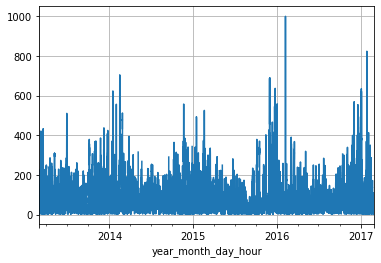

In [ ]:
pm_data1.plot(grid=True)

In [ ]:
pm_data2 = df2['PM10']
pm_data2

year_month_day_hour
2013-03-01 00:00:00     9.0
2013-03-01 01:00:00    11.0
2013-03-01 02:00:00     8.0
2013-03-01 03:00:00     8.0
2013-03-01 04:00:00     8.0
                       ... 
2017-02-28 19:00:00    32.0
2017-02-28 20:00:00    32.0
2017-02-28 21:00:00    28.0
2017-02-28 22:00:00    23.0
2017-02-28 23:00:00    19.0
Name: PM10, Length: 35064, dtype: float64

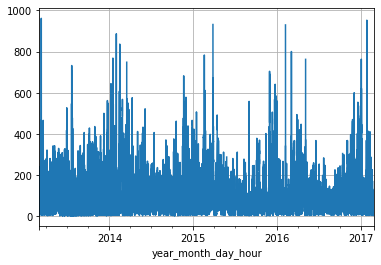

In [ ]:
pm_data2.plot(grid=True)

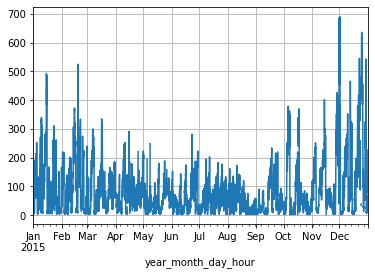

In [ ]:
df2_2015= df2.loc['2015']
pm_data_2015 = df2_2015['PM2.5']
pm_data_2015.plot(grid=True)

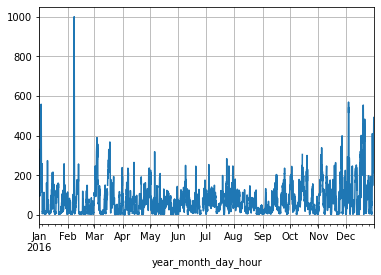

In [ ]:
df2_2016= df2.loc['2016']
pm_data_2016 = df2_2016['PM2.5']
pm_data_2016.plot(grid=True)

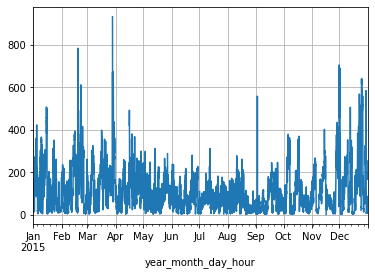

In [ ]:
df3_2015= df2.loc['2015']
pm_data1_2015 = df3_2015['PM10']
pm_data1_2015.plot(grid=True)

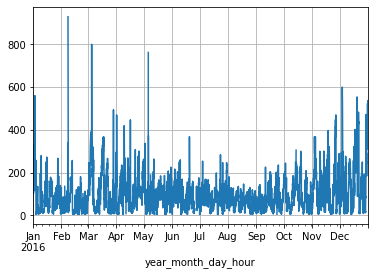

In [ ]:
df3_2016= df2.loc['2016']
pm_data2_2015 = df3_2016['PM10']
pm_data2_2015.plot(grid=True)

In [ ]:
figure = px.line(df_non_indexed, x ='year_month_day_hour', y = 'PM2.5', title = 'PM2.5 over years')

figure.update_xaxes(rangeslider_visible= True)
figure.show()

In [ ]:
figure2 = px.line(df_non_indexed, x ='year_month_day_hour', y = 'PM10', title = 'PM10 over years')

figure2.update_xaxes(rangeslider_visible= True)
figure2.show()

In [ ]:
figure3 = px.line(df_non_indexed, x ='year_month_day_hour', y = 'PM2.5', title = 'PM2.5 over years')

figure3.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="todate"),
            dict(count=2, label="2y", step="year", stepmode="todate"),
            dict(count=3, label="3y", step="year", stepmode="todate"),
            dict(step="all")
        ])
    )
)
figure3.show()

Text(0.5, 1.0, 'Air Quality plot for the year 2015 and 2016')

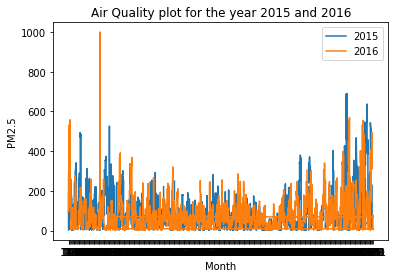

In [ ]:
df2_2015 =  df2['2015'].reset_index()
df2_2016 = df2['2016'].reset_index()

df2_2015['month_day_hour'] = df2_2015.apply(lambda x: str(x['month'])+"-"+x['day'], axis=1)
df2_2016['month_day_hour'] = df2_2016.apply(lambda x: str(x['month'])+"-"+x['day'], axis=1)

plt.plot(df2_2015['month_day_hour'], df2_2015['PM2.5'])
plt.plot(df2_2016['month_day_hour'], df2_2016['PM2.5'])

plt.legend(['2015', '2016'])
#plt.figure(figsize=(50,50))
plt.xlabel('Month')
plt.ylabel('PM2.5')
plt.title('Air Quality plot for the year 2015 and 2016')

In [ ]:
df2['2013':'2016'][['month','PM10']].groupby('month').describe()

PM10                                                         
        count        mean         std  min   25%    50%     75%    max
month                                                                 
1      2206.0  123.601315  112.663216  3.0  32.0  104.0  176.00  886.0
2      1995.0  119.783459  127.749285  5.0  26.0   75.0  167.00  929.0
3      2955.0  143.007783  114.876197  5.0  49.0  122.0  207.00  961.0
4      2843.0  116.355962   74.840904  3.0  61.0  111.0  155.00  576.0
5      2911.0  107.846135   66.958466  2.0  58.0   99.0  144.00  762.0
6      2803.0   91.131823   62.717025  3.0  44.0   81.0  127.00  527.0
7      2959.0   86.006083   58.815850  2.0  43.0   78.0  117.00  732.0
8      2962.0   76.435348   51.860486  2.0  33.0   69.0  107.00  344.0
9      2844.0   88.792651   64.305690  3.0  35.0   80.0  125.00  558.0
10     2938.0  116.905378   93.331692  3.0  40.0   93.0  175.00  462.0
11     2854.0  130.825123  112.648637  3.0  37.0  102.0  195.75  704.0
12     2922.0  145.636003  138.835047  2.0  29.0  103.0  218.75  690.0

In [ ]:
df2['2013':'2016'][['month','PM10','TEMP']].groupby('month').agg({'PM10':['max'], 'TEMP':['min','max']})

PM10  TEMP      
         max   min   max
month                   
1      886.0 -16.8  13.4
2      929.0 -11.0  13.0
3      961.0  -7.3  26.0
4      576.0   0.4  31.9
5      762.0   5.3  40.6
6      527.0  14.4  37.3
7      732.0  17.0  38.8
8      344.0  14.9  36.5
9      558.0   6.5  32.6
10     462.0  -0.3  28.4
11     704.0  -9.7  20.4
12     690.0 -10.1  15.0

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f03547dd390>,
      dtype=object)

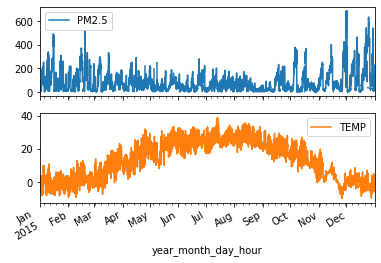

In [ ]:
df2_2015 = df2['2015']
pm_data_2015 = df2_2015[['PM2.5','TEMP']]
pm_data_2015.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f03544450f0>,
      dtype=object)

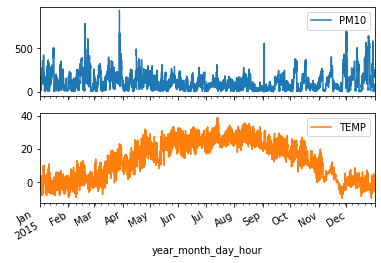

In [ ]:
df2_2015 = df2['2015']
pm_data_2015 = df2_2015[['PM10','TEMP']]
pm_data_2015.plot(subplots=True)

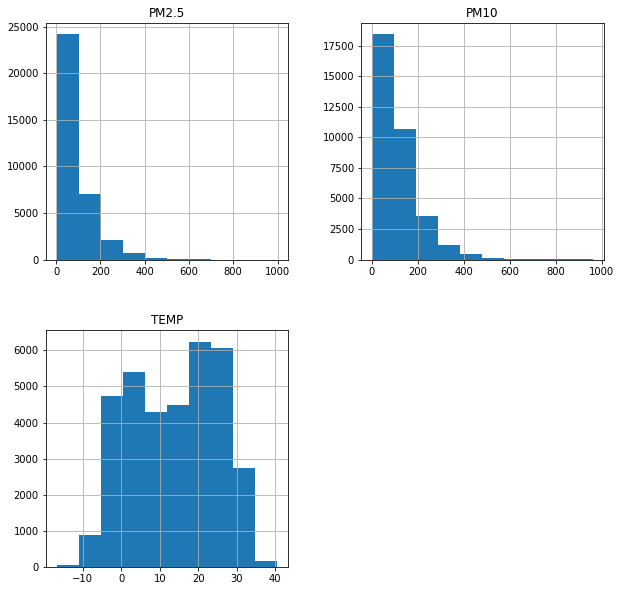

In [ ]:
df2[['PM2.5','PM10','TEMP']].hist(figsize=(10,10));

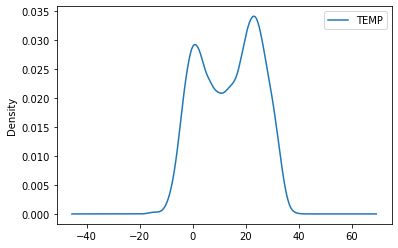

In [ ]:
df2[['TEMP']].plot(kind='density')

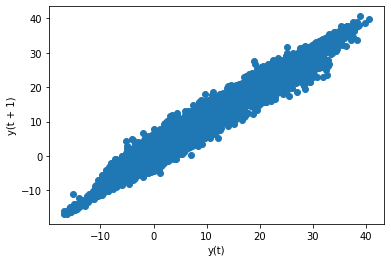

In [ ]:
#first order lag plot
pd.plotting.lag_plot(df2['TEMP'],lag=1)

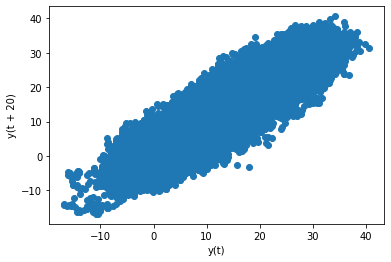

In [ ]:
pd.plotting.lag_plot(df2['TEMP'],lag=20)

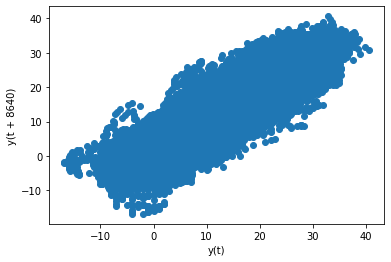

In [ ]:
#one year lag
pd.plotting.lag_plot(df2['TEMP'],lag=8640)

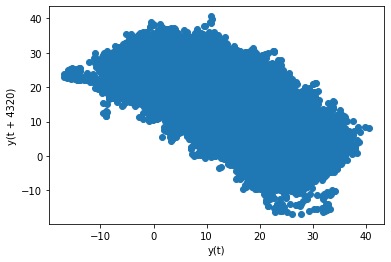

In [ ]:
#negative correlation between 6 months
pd.plotting.lag_plot(df2['TEMP'],lag=4320)

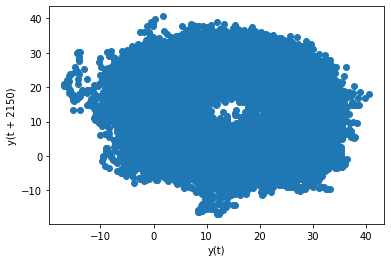

In [ ]:
#no correlation - 3 months
pd.plotting.lag_plot(df2['TEMP'],lag=2150)

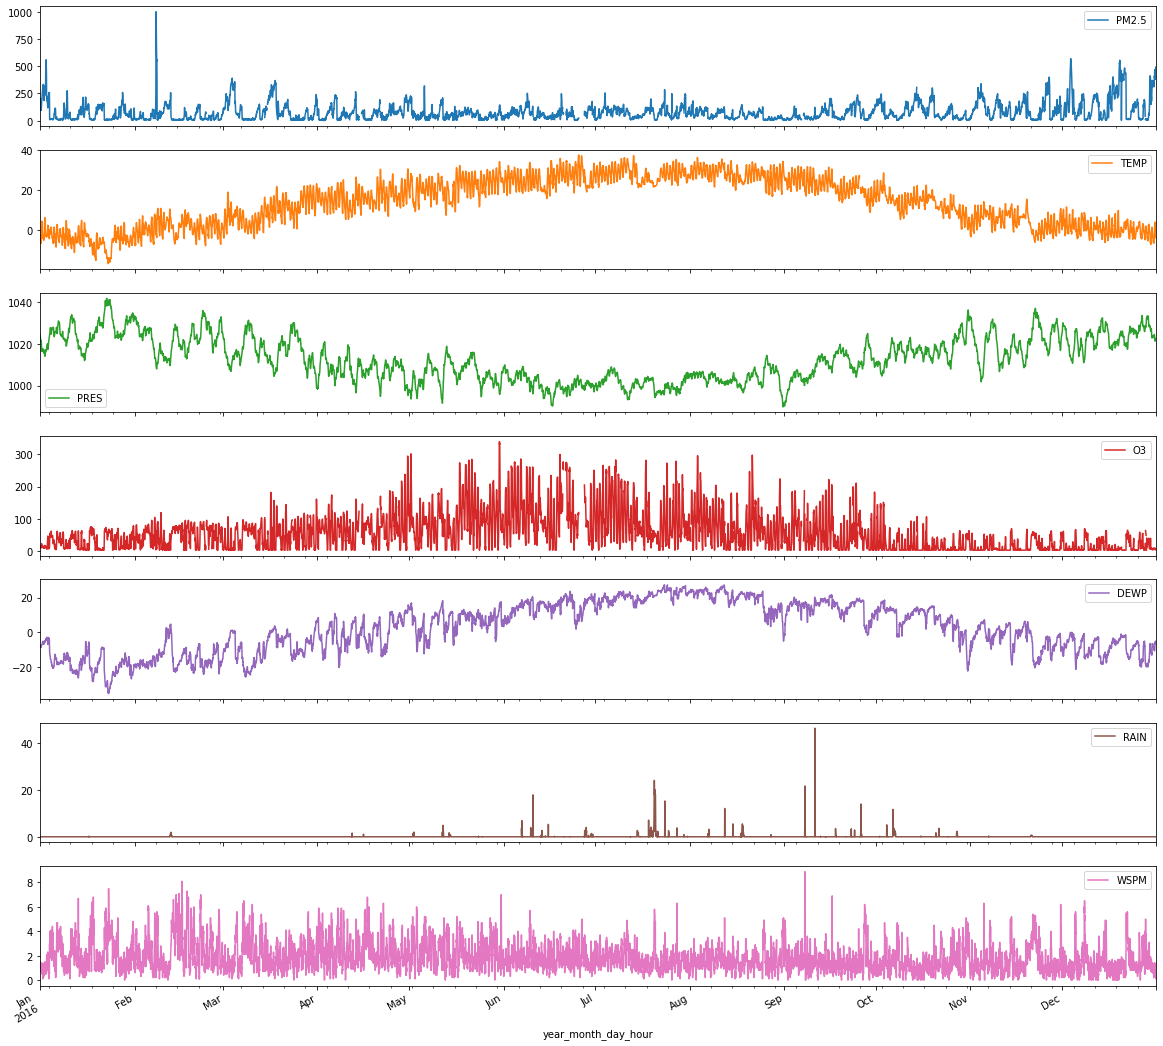

In [ ]:
df2_2016 = df2['2016']
pm_data_2016 = df2_2016[['PM2.5','TEMP','PRES','O3', 'DEWP','RAIN', 'wd', 'WSPM']]
pm_data_2016.plot(subplots=True,figsize=(20,20));

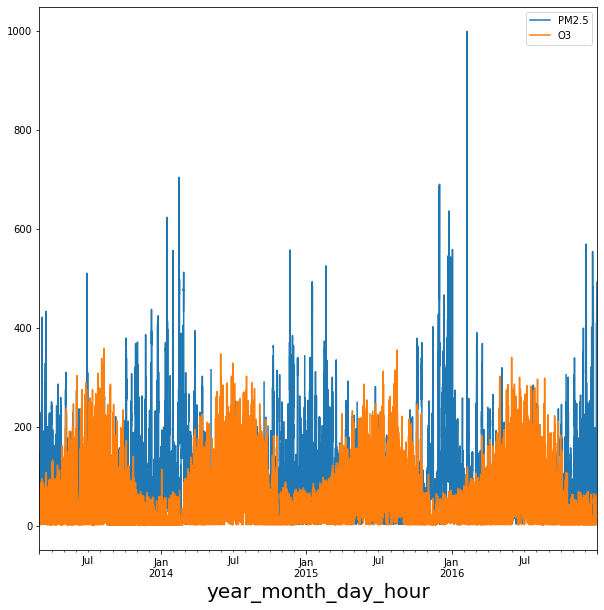

In [ ]:
df2['2013':'2016'][['PM2.5','O3']].plot(figsize=(10,10))
plt.xlabel('year_month_day_hour', fontsize=20);

In [ ]:
df2_2015['PM2.5'].isnull().sum()

222

In [ ]:
df2.isnull().sum()

year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64

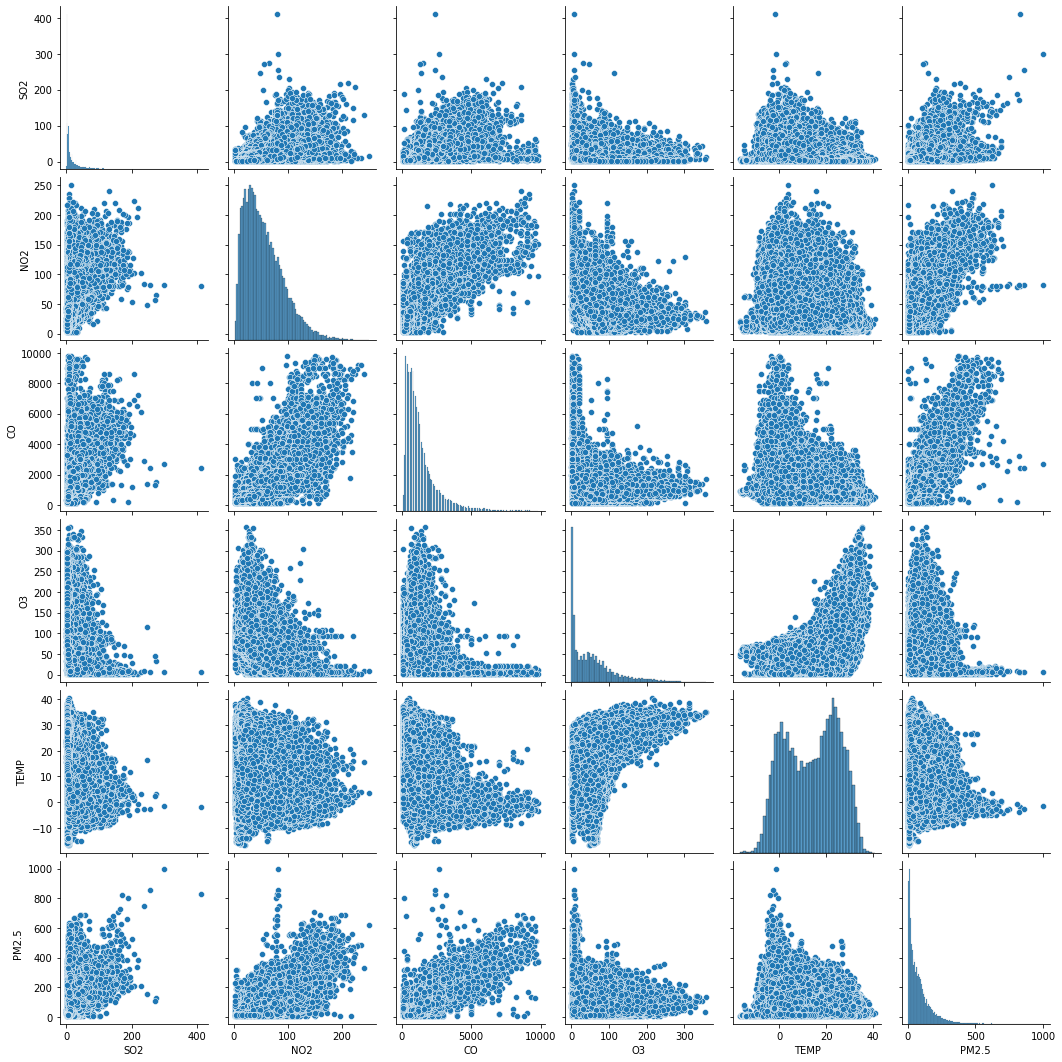

In [ ]:
pairplot1 = sns.pairplot(df2[['SO2','NO2','CO','O3','TEMP','PM2.5']])

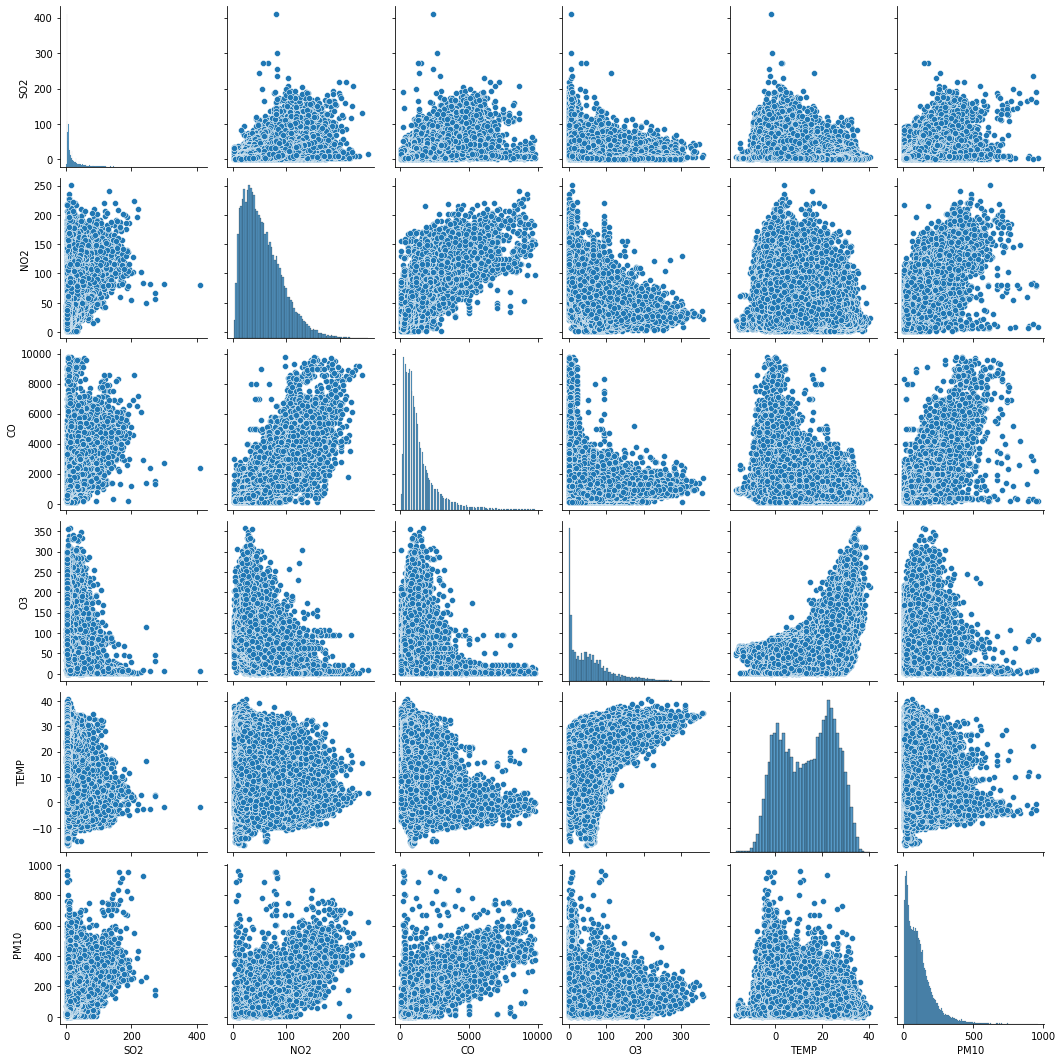

In [ ]:
pairplot2 = sns.pairplot(df2[['SO2','NO2','CO','O3','TEMP','PM10']])

In [ ]:
df2_corr = df2[['SO2','NO2','CO','O3','TEMP','PM10']].corr(method='pearson')
df2_corr

SO2       NO2        CO        O3      TEMP      PM10
SO2   1.000000  0.489093  0.559398 -0.187482 -0.349636  0.507896
NO2   0.489093  1.000000  0.744616 -0.520569 -0.306174  0.680531
CO    0.559398  0.744616  1.000000 -0.330389 -0.334528  0.737748
O3   -0.187482 -0.520569 -0.330389  1.000000  0.616872 -0.142635
TEMP -0.349636 -0.306174 -0.334528  0.616872  1.000000 -0.144769
PM10  0.507896  0.680531  0.737748 -0.142635 -0.144769  1.000000

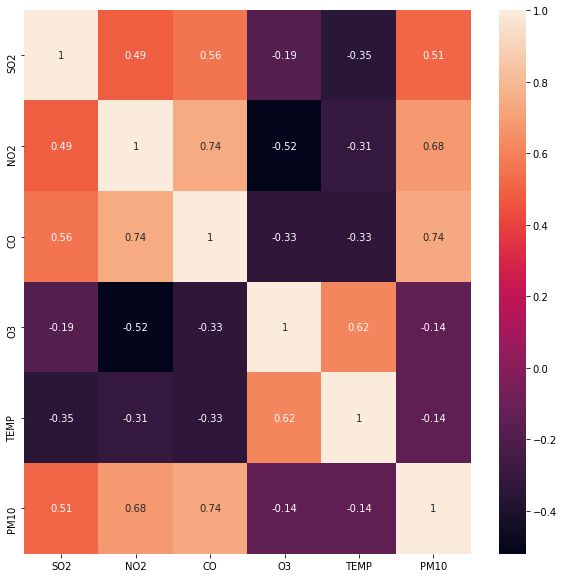

In [ ]:
heatmap = sns.heatmap((df2_corr),annot=True)
heatmap.figure.set_size_inches(10,10)

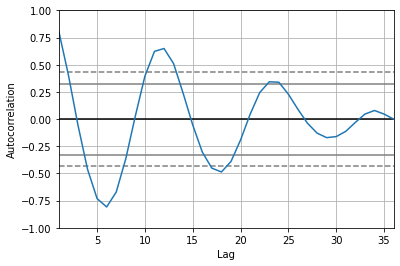

In [ ]:
pd.plotting.autocorrelation_plot(df2['2014':'2016']['TEMP'].resample('1m').mean())

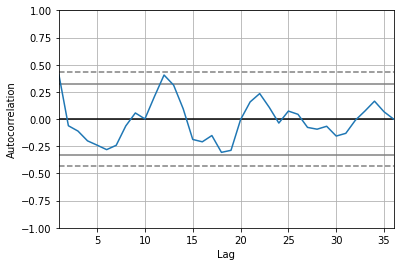

In [ ]:
pd.plotting.autocorrelation_plot(df2['2014':'2016']['PM2.5'].resample('1m').mean())